# Library + Data pre-processed


In [1]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold



from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [15]:
#file
AAC= pd.read_csv('/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/AAC.csv')
CC= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/CC_P.csv")
CK= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/ck_pos.csv")
DPC= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/DPC-pos.csv")
PAAC= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/PAAC_P.csv")
QSO= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/QSO_P.csv")
CTDT= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/CTDT_P.csv")
CTDC= pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/CTDC_P.csv")
w2v=  pd.read_csv("/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/W2V-pos.csv")


shuffeling

In [3]:
df1=AAC.sample(frac=1).reset_index(drop=True)

In [4]:
df2=CC.sample(frac=1).reset_index(drop=True)

In [5]:
df3=CK.sample(frac=1).reset_index(drop=True)

In [6]:
df4=DPC.sample(frac=1).reset_index(drop=True)

In [7]:
df5=PAAC.sample(frac=1).reset_index(drop=True)

In [8]:
df6=QSO.sample(frac=1).reset_index(drop=True)

In [9]:
df7=CTDT.sample(frac=1).reset_index(drop=True)

In [10]:
df8=CTDC.sample(frac=1).reset_index(drop=True)

In [11]:
df9=w2v.sample(frac=1).reset_index(drop=True)

model set

In [17]:
#traditional model
lr= LogisticRegression(random_state=100,penalty='l2',solver='lbfgs',multi_class="ovr")
rf= RandomForestClassifier(n_estimators=100,criterion='entropy',max_features="sqrt",random_state=140)
svc = SVC(kernel='poly', degree = 3)
#svm = svm.SVC(kernel='linear', C=1)
ridge=RidgeClassifier()
ada=AdaBoostClassifier()
sgd=SGDClassifier()
ex=ExtraTreesClassifier(n_estimators=100, random_state=10)
la=LinearDiscriminantAnalysis()
lsv=LinearSVC()
dt=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_split=10)
mlp= MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')
knn= KNeighborsClassifier(n_neighbors=100,metric='manhattan',weights='distance',algorithm="kd_tree")
lgbm = LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100, subsample=1.0,colsample_bytree=1.0, reg_alpha=30, reg_lambda=10)
xgb = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)

#VOTING (HARD+SOFT)
from sklearn.ensemble import  VotingClassifier
vth1 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='soft')
vth2 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='soft')
vth3 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='soft')
vth4 = VotingClassifier(estimators=[ ('lgbm', lgbm),('rf',rf)], voting='hard')
vth5 = VotingClassifier(estimators=[ ('lgbm', lgbm),('knn',knn)], voting='hard')
vth6 = VotingClassifier(estimators=[ ('lgbm', lgbm),('dt',dt)], voting='hard')
vth7 = VotingClassifier(estimators=[ ('lgbm', lgbm),('mlp',mlp)], voting='hard')
vth8 = VotingClassifier(estimators=[ ('dt', dt),('xgb', xgb)], voting='hard')
vth9 = VotingClassifier(estimators=[ ('dt', dt),('mlp', mlp),('xgb', xgb),('lgbm', lgbm),('ex', ex),('knn', knn)], voting='hard')
vth10 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='hard')
vth11 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
vth12 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='hard')
vth13 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm),('rf',rf)], voting='hard')


#STACKING
from sklearn.ensemble import StackingClassifier
stk1 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=LogisticRegression())
stk2 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=LogisticRegression())
stk3 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=LogisticRegression())
stk4 = StackingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk5 = StackingClassifier(estimators=[('xgb', xgb), ('mlp', mlp), ('dt', dt),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression())
stk7 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=RandomForestClassifier())
#stk8 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=RandomForestClassifier())
stk9 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=RandomForestClassifier())
stk10 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb), ('rf', rf), ('lr', lr), ('mlp', mlp),], final_estimator=LogisticRegression())
stk11 = StackingClassifier(estimators=[('dt',dt),('knn', knn), ('rf', rf), ('mlp', mlp), ('lgbm', lgbm),], final_estimator=LogisticRegression())
stk12 = StackingClassifier(estimators=[('xgb',rf),('knn', knn), ('rf', rf), ('dt', dt), ('ex', ex),], final_estimator=LogisticRegression())

model_list = [ex,lr,rf,svc,knn,ada,dt,lgbm,xgb,vth1,vth2,vth3,vth4,vth5,vth6,vth7,vth8,vth9,vth10,vth11,vth12,vth13,stk1,stk2,stk3,stk4,stk5,stk6,stk7,stk9,stk10,stk11,stk12]

# 10-fold CV + Independent tes

## AAC

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df1.drop('Target', axis=1)
y1 = df1['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]


total_Metrics.to_csv("AAC_CV.csv")

#---------------------------------------------------------------------------------
X = df1.drop('Target', axis=1)
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("AAC_ train_test.csv")


## CCC

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df2.drop('Target', axis=1)
y1 = df2['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]

total_Metrics.to_csv("CC_CV.csv")



#---------------------------------------------------------------------------------
X = df2.drop('Target', axis=1)
y = df2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("CC_ train_test.csv")


## CK

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df3.drop('Target', axis=1)
y1 = df3['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]


total_Metrics.to_csv("Ck_CV.csv")


#---------------------------------------------------------------------------------
X = df3.drop('Target', axis=1)
y = df3['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("Ck_ train_test.csv")


## DPC

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df1.drop('Target', axis=1)
y1 = df1['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]


total_Metrics.to_csv("DPC_CV.csv")



#---------------------------------------------------------------------------------
X = df4.drop('Target', axis=1)
y = df4['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("DPC_ train_test.csv")


## pAAC

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df5.drop('Target', axis=1)
y1 = df5['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]


total_Metrics.to_csv("PAAC_CV.csv")


#---------------------------------------------------------------------------------
X = df5.drop('Target', axis=1)
y = df5['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("PAAC_ train_test.csv")


## QSO

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df6.drop('Target', axis=1)
y1 = df6['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]

total_Metrics.to_csv("QSO_CV.csv")


#---------------------------------------------------------------------------------
X = df6.drop('Target', axis=1)
y = df6['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("QSO_ train_test.csv")


##CTDT

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df7.drop('Target', axis=1)
y1 = df7['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]

total_Metrics.to_csv("CTDT_CV.csv")

#---------------------------------------------------------------------------------
X = df7.drop('Target', axis=1)
y = df7['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("CTDT_ train_test.csv")


## CTDC

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df8.drop('Target', axis=1)
y1 = df8['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]


total_Metrics.to_csv("CTDC_CV.csv")

#---------------------------------------------------------------------------------
X = df8.drop('Target', axis=1)
y = df8['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("CTDC_ train_test.csv")


## W2V

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
sensitivity_scores = []
specificity_scores = []
kappa_scores = []
mcc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Load train and test datasets
X1 = df9.drop('Target', axis=1)
y1 = df9['Target']

total_Metrics = []
total_Metrics = pd.DataFrame(total_Metrics)
total_Metrics['Classifier'] = 'Classifier'
total_Metrics['Accuracy'] = 'avg_accuracy'
total_Metrics['Kappa'] = 'Kappa'
total_Metrics['mcc'] = 'mcc'
total_Metrics['precision'] = 'precision'
total_Metrics['recall'] = 'recall'
total_Metrics['f1'] = 'f1'
total_Metrics['Sensitivity'] = 'avg_sensitivity'
total_Metrics['Specifity'] = 'avg_specificity'
for model in model_list:

 for train_idx, test_idx in kfold.split(X1):
     X_train1, X_test1 = X1.iloc[train_idx], X1.iloc[test_idx]
     y_train1, y_test1 = y1.iloc[train_idx], y1.iloc[test_idx]

     model.fit(X_train1, y_train1)       # Train the model on the training data
     y_pred1 = model.predict(X_test1)       # Predict the target variable on the test data
     tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()    # Compute the confusion matrix
     accuracy = (tp + tn) / (tp + tn + fp + fn)
     sensitivity = tp / (tp + fn)
     specificity = tn / (tn + fp)
     kappa = cohen_kappa_score(y_test1, y_pred1)
     mcc = matthews_corrcoef(y_test1, y_pred1)
     precision = precision_score(y_test1, y_pred1)
     recall = recall_score(y_test1, y_pred1)
     f1 = f1_score(y_test1, y_pred1)
    # Append the scores to the list
     accuracy_scores.append(accuracy)
     sensitivity_scores.append(sensitivity)
     specificity_scores.append(specificity)
     kappa_scores.append(kappa)
     mcc_scores.append(mcc)
     precision_scores.append(precision)
     recall_scores.append(recall)
     f1_scores.append(f1)
# Compute the average sensitivity and specificity across all folds
 avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
 avg_specificity = sum(specificity_scores) / len(specificity_scores)
 avg_kappa = sum(kappa_scores) / len(kappa_scores)
 avg_mcc = sum(mcc_scores) / len(mcc_scores)
 avg_precision = sum(precision_scores) / len(precision_scores)
 avg_recall = sum(recall_scores) / len(recall_scores)
 avg_f1 = sum(f1_scores) / len(f1_scores)
 total_Metrics.loc[len(total_Metrics.index)] = [model.__class__.__name__,avg_accuracy,avg_sensitivity,avg_specificity,avg_kappa,avg_mcc,avg_precision,avg_recall,avg_f1]


total_Metrics.to_csv("W2V_CV.csv")

#---------------------------------------------------------------------------------
X = df9.drop('Target', axis=1)
y = df9['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
total_Metics = []
total_Metics = pd.DataFrame(total_Metics)
total_Metics['Classifier'] = 'Classifier'
total_Metics['Accuracy'] = 'Accuracy'
total_Metics['mcc'] = 'mcc'
# total_Metics['auc'] = 'auc'
total_Metics['Kappa'] = 'Kappa'
total_Metics['precision'] = 'precision'
total_Metics['recall'] = 'recall'
total_Metics['f1'] = 'f1'
total_Metics['specificity'] = 'specificity'
total_Metics['sensitivity'] = 'sensitivity'

for model in model_list:
  from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + fp)
  sensitivity = tp / (tp + fn)

  # report performance
  Accuracy = accuracy_score(y_test2, y_pred)
  mcc = matthews_corrcoef(y_test2, y_pred)
  kappa = cohen_kappa_score(y_test2, y_pred)
  f1 = f1_score(y_test2, y_pred, average='micro')
  precision_score = precision_score(y_test2, y_pred, average='micro')
  recall_score = recall_score(y_test2, y_pred, average='micro')
  # y_pred = np.argmax(y_pred, axis=0)
  # auc = roc_auc_score(y, y_pred, multi_class='ovr')
  total_Metics.loc[len(total_Metics.index)] = [model,Accuracy, mcc, kappa, precision_score,recall_score, f1,specificity ,sensitivity]


total_Metics.to_csv("w2v_ train_test.csv")


# probability features ALL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

X = df9.drop('Target', axis=1)
y = df9['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


rf_probs = rf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
ex_probs = ex.fit(X_train, y_train).predict_proba(X_test)[:, 1]
stk12_probs = stk12.fit(X_train, y_train).predict_proba(X_test)[:, 1]
xgb_probs = xgb.fit(X_train, y_train).predict_proba(X_test)[:, 1]
dt_probs = dt.fit(X_train, y_train).predict_proba(X_test)[:, 1]
knn_probs = knn.fit(X_train, y_train).predict_proba(X_test)[:, 1]
meta_data = pd.DataFrame({
    'RF-Word2Vec': rf_probs,
    'EX-Word2Vec': ex_probs,
    'AB-Word2Vec': stk12_probs,
    'xgb-Word2Vec': xgb_probs,
    'DT-Word2Vec': dt_probs,
    'KNN-Word2Vec': knn_probs,
    'Target': y_test
})

meta_data.to_csv('AACddd_proba.csv', index=False)


# **ANN code CV+independent test**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, recall_score, precision_score, f1_score, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load your dataset
data_path = '/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/aaaaaaaaallllllllllllllllll.csv'
df = pd.read_csv(data_path)

# Assuming your target column is named 'Target'
X = df.drop('Target', axis=1)
y = df['Target']

# Define the number of folds for cross-validation
n_splits = 10  # You can adjust the number of splits as needed

# Initialize lists to store evaluation results
kappa_scores = []
mcc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
accuracy_scores = []

# Define the input shape based on the number of features
input_shape = (X.shape[1],)

# Create a K-fold cross-validator
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    input_layer = Input(shape=input_shape)

    # Define your ANN model architecture here
    dense_layer1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
    dropout_layer1 = Dropout(0.6)(dense_layer1)
    dense_layer2 = Dense(100, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer1)
    dropout_layer2 = Dropout(0.7)(dense_layer2)
    dense_layer3 = Dense(60, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer2)
    dropout_layer3 = Dropout(0.5)(dense_layer3)
    dense_layer4 = Dense(20, activation='relu', kernel_regularizer=l2(0.05))(dropout_layer2)
    dropout_layer4 = Dropout(0.3)(dense_layer4)

    output_layer = Dense(1, activation='sigmoid')(dropout_layer4)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Add early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)


    # Train the model with early stopping
    history1 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    kappa = cohen_kappa_score(y_test, y_pred_classes)
    mcc = matthews_corrcoef(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    accuracy = accuracy_score(y_test, y_pred_classes)

    kappa_scores.append(kappa)
    mcc_scores.append(mcc)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Calculate and print the mean and standard deviation of the evaluation scores
print("Mean Cohen's Kappa Score:", np.mean(kappa_scores))
print("Mean Matthews Correlation Coefficient:", np.mean(mcc_scores))
print("Mean Recall (True Positive Rate):", np.mean(recall_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean Test accuracy:", np.mean(accuracy_scores))


Epoch 1/100
14/14 [==============================] - 2s 24ms/step - loss: 4.0974 - accuracy: 0.4744 - val_loss: 3.6883 - val_accuracy: 0.6042
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 3.5828 - accuracy: 0.5628 - val_loss: 3.2903 - val_accuracy: 0.7500
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 3.1712 - accuracy: 0.6093 - val_loss: 2.9312 - val_accuracy: 0.7500
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 2.8364 - accuracy: 0.6651 - val_loss: 2.6147 - val_accuracy: 0.7917
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 2.5150 - accuracy: 0.7093 - val_loss: 2.3243 - val_accuracy: 0.7917
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 2.2595 - accuracy: 0.7349 - val_loss: 2.0573 - val_accuracy: 0.8125
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 2.0263 - accuracy: 0.7605 - val_loss: 1.8244 - val_accuracy: 0.8542
Epoch 8/

test

Epoch 1/50
12/12 [==============================] - 2s 24ms/step - loss: 4.1241 - accuracy: 0.4869 - val_loss: 3.8382 - val_accuracy: 0.5208
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 3.6928 - accuracy: 0.4974 - val_loss: 3.4468 - val_accuracy: 0.5208
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 3.2985 - accuracy: 0.5681 - val_loss: 3.0972 - val_accuracy: 0.6458
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 2.9424 - accuracy: 0.6387 - val_loss: 2.7807 - val_accuracy: 0.7708
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 2.6417 - accuracy: 0.6780 - val_loss: 2.4907 - val_accuracy: 0.8542
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 2.3777 - accuracy: 0.6754 - val_loss: 2.2312 - val_accuracy: 0.8646
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 2.1401 - accuracy: 0.7094 - val_loss: 1.9855 - val_accuracy: 0.8750
Epoch 8/50
12/12 [=

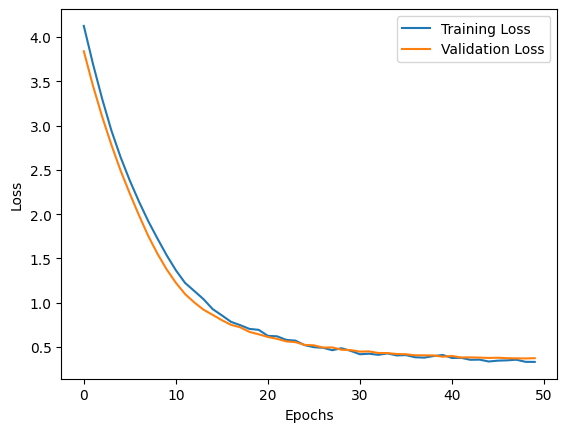

3/3 [==============================] - 0s 4ms/step
Cohen's Kappa Score: 0.8129870129870129
Matthews Correlation Coefficient: 0.8217261234735762
Recall (True Positive Rate): 0.9787234042553191
Precision: 0.8518518518518519
F1 Score: 0.9108910891089108
Test accuracy: 0.90625


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, recall_score, precision_score, f1_score, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load your dataset
data_path = '/content/drive/MyDrive/ANNprob-ACPS revised paper/Dataset ALL/merged data/aaaaaaaaallllllllllllllllll.csv'
df = pd.read_csv(data_path)

# Assuming your target column is named 'Target'
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Define your ANN model architecture here
dense_layer1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
dropout_layer1 = Dropout(0.6)(dense_layer1)
dense_layer2 = Dense(100, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer1)
dropout_layer2 = Dropout(0.7)(dense_layer2)
dense_layer3 = Dense(60, activation='relu', kernel_regularizer=l2(0.01))(dropout_layer2)
dropout_layer3 = Dropout(0.5)(dense_layer3)
dense_layer4 = Dense(20, activation='relu', kernel_regularizer=l2(0.05))(dropout_layer2)
dropout_layer4 = Dropout(0.3)(dense_layer4)

output_layer = Dense(1, activation='sigmoid')(dropout_layer4)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training and validation loss to visualize overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

kappa = cohen_kappa_score(y_test, y_pred_classes)
mcc = matthews_corrcoef(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)

print("Cohen's Kappa Score:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Recall (True Positive Rate):", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Test accuracy:", accuracy)


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.Explainer(model.predict,X_test)
r_shap_values = explainer(X_test)

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 3/96 [00:00<?, ?it/s]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 5/96 [00:16<03:52,  2.56s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 6/96 [00:21<05:38,  3.76s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 7/96 [00:25<05:39,  3.82s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 8/96 [00:29<05:36,  3.82s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 9/96 [00:35<06:26,  4.45s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 10/96 [00:39<06:13,  4.34s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 11/96 [00:44<06:35,  4.66s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 12/96 [00:49<06:37,  4.73s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 13/96 [00:53<06:17,  4.54s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 14/96 [00:57<05:55,  4.34s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 15/96 [01:02<06:12,  4.60s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 16/96 [01:07<05:57,  4.47s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 17/96 [01:11<05:42,  4.34s/it]

160/160 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  19%|█▉        | 18/96 [01:16<05:54,  4.54s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 19/96 [01:19<05:23,  4.20s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 20/96 [01:23<05:03,  3.99s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 21/96 [01:26<04:57,  3.97s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 22/96 [01:32<05:22,  4.35s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 23/96 [01:36<05:06,  4.20s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 24/96 [01:39<04:42,  3.92s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 25/96 [01:44<05:00,  4.24s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 26/96 [01:49<05:20,  4.58s/it]

161/161 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  28%|██▊       | 27/96 [01:55<05:44,  4.99s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 28/96 [02:01<05:48,  5.13s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 29/96 [02:05<05:24,  4.84s/it]

162/162 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  31%|███▏      | 30/96 [02:08<04:58,  4.52s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 31/96 [02:14<05:19,  4.91s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 32/96 [02:19<05:18,  4.97s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 33/96 [02:25<05:23,  5.13s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 34/96 [02:30<05:18,  5.14s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 35/96 [02:34<04:50,  4.76s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 36/96 [02:40<05:04,  5.07s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 37/96 [02:45<04:59,  5.08s/it]

161/161 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  40%|███▉      | 38/96 [02:49<04:42,  4.86s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 39/96 [02:54<04:37,  4.87s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 40/96 [02:58<04:16,  4.58s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 41/96 [03:02<04:04,  4.45s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 42/96 [03:07<04:07,  4.58s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 43/96 [03:11<03:51,  4.37s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 44/96 [03:15<03:40,  4.24s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 45/96 [03:20<03:51,  4.55s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 46/96 [03:24<03:31,  4.24s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 47/96 [03:28<03:22,  4.13s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 48/96 [03:33<03:33,  4.45s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 49/96 [03:37<03:21,  4.28s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 50/96 [03:40<03:01,  3.96s/it]

163/163 [==============================] - 1s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 51/96 [03:45<03:09,  4.20s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 52/96 [03:49<03:08,  4.29s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 53/96 [03:53<03:00,  4.19s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  56%|█████▋    | 54/96 [03:59<03:19,  4.75s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 55/96 [04:04<03:13,  4.71s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 56/96 [04:08<03:02,  4.56s/it]

162/162 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  59%|█████▉    | 57/96 [04:12<02:52,  4.42s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 58/96 [04:17<02:56,  4.66s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████▏   | 59/96 [04:20<02:36,  4.23s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▎   | 60/96 [04:25<02:32,  4.25s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 61/96 [04:29<02:31,  4.34s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 62/96 [04:35<02:38,  4.66s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|██████▌   | 63/96 [04:39<02:30,  4.55s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 64/96 [04:44<02:30,  4.71s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 65/96 [04:48<02:20,  4.54s/it]

162/162 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|██████▉   | 66/96 [04:52<02:13,  4.44s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 67/96 [04:57<02:08,  4.42s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 68/96 [05:01<02:00,  4.29s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 69/96 [05:04<01:50,  4.10s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 70/96 [05:10<01:57,  4.52s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 71/96 [05:13<01:43,  4.16s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 72/96 [05:17<01:39,  4.13s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 73/96 [05:22<01:37,  4.25s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 74/96 [05:26<01:32,  4.23s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 75/96 [05:31<01:34,  4.50s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 76/96 [05:36<01:31,  4.58s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 77/96 [05:42<01:35,  5.01s/it]

162/162 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  81%|████████▏ | 78/96 [05:47<01:28,  4.91s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 79/96 [05:52<01:27,  5.17s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 80/96 [05:57<01:17,  4.87s/it]

162/162 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  84%|████████▍ | 81/96 [06:01<01:09,  4.67s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 82/96 [06:07<01:11,  5.10s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 83/96 [06:11<01:01,  4.74s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 84/96 [06:17<01:01,  5.13s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▊ | 85/96 [06:21<00:54,  4.97s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 86/96 [06:26<00:47,  4.72s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  91%|█████████ | 87/96 [06:31<00:44,  4.93s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 88/96 [06:35<00:38,  4.81s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 89/96 [06:39<00:31,  4.51s/it]

161/161 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 90/96 [06:43<00:26,  4.37s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 91/96 [06:48<00:22,  4.53s/it]

161/161 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 92/96 [06:54<00:19,  4.77s/it]

161/161 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  97%|█████████▋| 93/96 [06:59<00:14,  4.83s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 94/96 [07:03<00:09,  4.63s/it]

162/162 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 95/96 [07:07<00:04,  4.58s/it]

163/163 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|██████████| 96/96 [07:12<00:00,  4.64s/it]

163/163 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 97it [07:16,  4.65s/it]


# FIGURE

2/2 [==============================] - 0s 10ms/step


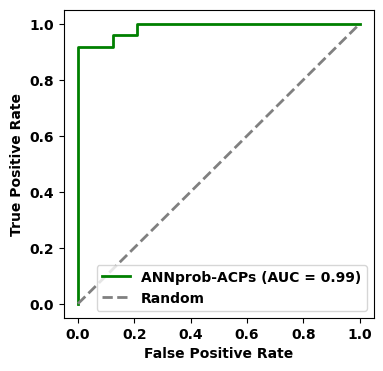

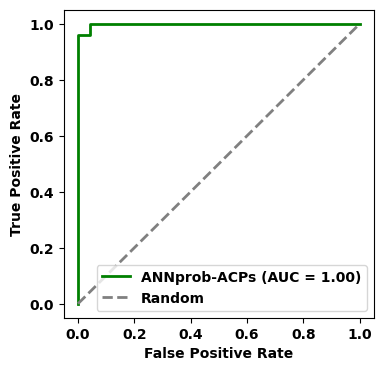

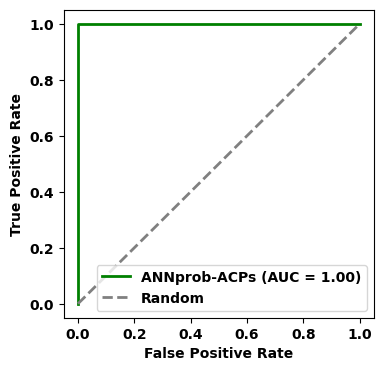

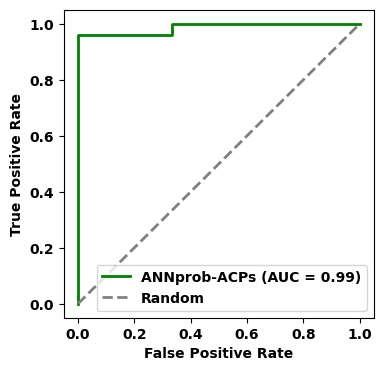

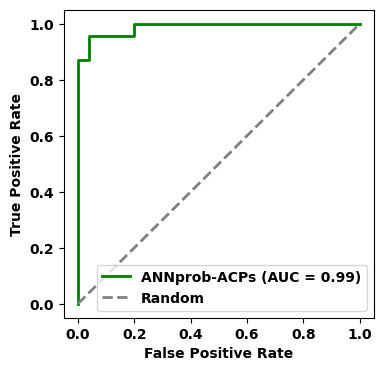

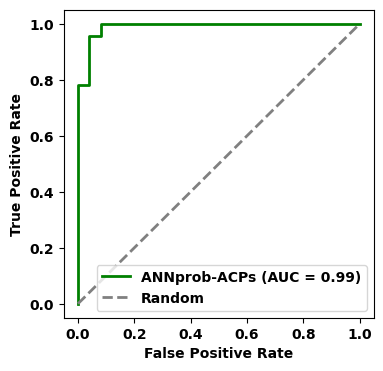

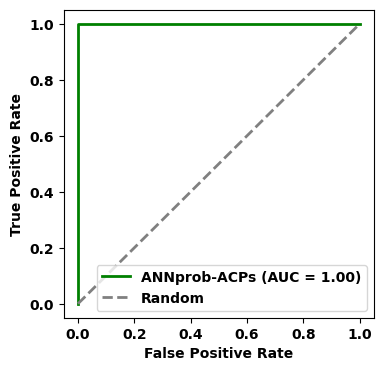

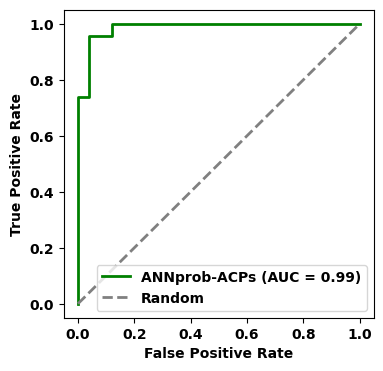

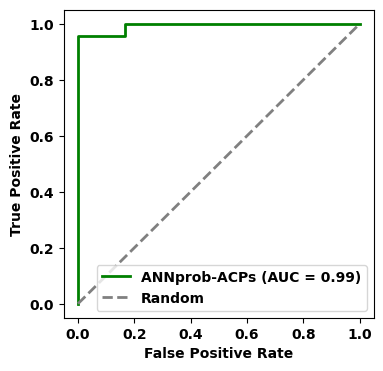

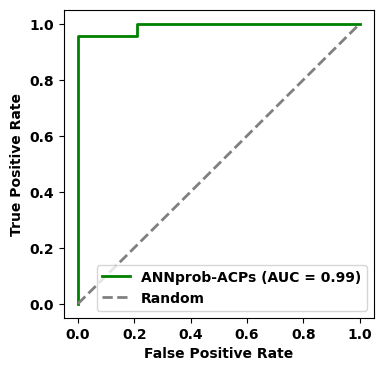

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font properties to bold
rcParams['font.weight'] = 'bold'



for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_score = y_pred.ravel()

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve with green color and bold font
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label=f'ANNprob-ACPs (AUC = {roc_auc:.2f})', color='green', linewidth=2, linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random', linewidth=2)
    plt.xlabel('False Positive Rate', weight='bold')
    plt.ylabel('True Positive Rate', weight='bold')
    plt.legend(loc='lower right', prop={'weight': 'bold'})

plt.show()


2/2 [==============================] - 0s 9ms/step


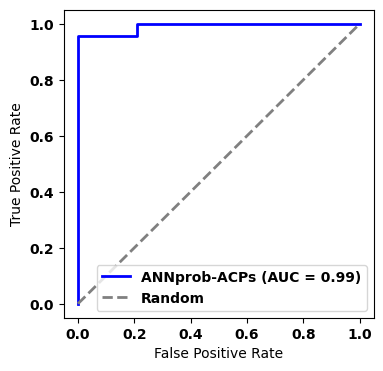

In [ ]:
from sklearn.metrics import roc_curve, auc


y_pred = model.predict(X_test)
y_score = y_pred.ravel()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f'ANNprob-ACPs (AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()
